### Evaluation for classification

In [1]:
# import the key libraries as needed
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics.regression import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits

In [2]:
# let's take a sample dataset from Sklearn
ds=load_digits()
type(ds)

sklearn.utils.Bunch

In [3]:
X, y = ds.data, ds.target

# explore the data
print(X[:2,:])
print('---------------------------')
print("target names:", ds.target_names)
print('---------------------------')


for class_name, class_count in zip(ds.target_names, np.bincount(ds.target)):    
    print(class_name,class_count)

[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]]
---------------------------
target names: [0 1 2 3 4 5 6 7 8 9]
---------------------------
0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [4]:
# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not digit 1' 
# Positive class (1) is 'digit 1'

y_binary_imbalanced = y.copy()

y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [5]:
type(y_binary_imbalanced)

numpy.ndarray

In [6]:
# let's do a count based on the imbalanced binary (categorical)

print(pd.value_counts(pd.Series(y_binary_imbalanced)))
print('-------------')
print(np.array(np.unique(y_binary_imbalanced, return_counts=True)).T)

0    1615
1     182
dtype: int64
-------------
[[   0 1615]
 [   1  182]]


In [7]:
# Negative class (0) is the most frequent class (using bincount)
np.bincount(y_binary_imbalanced)    

array([1615,  182], dtype=int64)

In [8]:
from sklearn.svm import SVC

# now Train & Test to split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

## Support Vector Machine classifier..using Regularization: C=1.. and "RBF" method
svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)

# prediction
rbfPred = svm.predict(X_test)
# score
svm.score(X_test, y_test)

C:\Users\bista\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9088888888888889

In [9]:
# we can also switch to "linear" on kernel and check the R2 score

svm = SVC(kernel='linear', C=1).fit(X_train, y_train)

# prediction
linPred = svm.predict(X_test)

# R2 score
r2_score(y_test, linPred)

0.7428718358950916

### Confusion Matrix 

In [10]:
## SVM: linear vs rbf (kernel)

svm1 = SVC(kernel='linear', C=1).fit(X_train, y_train)
linPredicted = svm1.predict(X_test)

svm2 = SVC(kernel='rbf', C=1).fit(X_train, y_train)
rbfPredicted = svm2.predict(X_test)

confusion1 = confusion_matrix(y_test, linPredicted)
confusion2 = confusion_matrix(y_test, rbfPredicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion1)
print('------------')
print('Support vector machine classifier (RBF kernel, C=1)\n', confusion2)

C:\Users\bista\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Support vector machine classifier (linear kernel, C=1)
 [[402   5]
 [  5  38]]
------------
Support vector machine classifier (RBF kernel, C=1)
 [[407   0]
 [ 41   2]]


In [11]:
## Logistic
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lrPredicted = lr.predict(X_test)

confusion = confusion_matrix(y_test, lrPredicted)
print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[401   6]
 [  6  37]]


C:\Users\bista\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
## Decisoin Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
dtPredicted = dt.predict(X_test)

confusion = confusion_matrix(y_test, dtPredicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


In [13]:
## R2 score

r2_score(y_test, linPredicted), r2_score(y_test, lrPredicted), r2_score(y_test, dtPredicted)

(0.7428718358950916, 0.69144620307411, 0.38289240614821995)

### Evaluation metrics for binary classification

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score     

# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 

# we print these outputs subject to the confusion matrix above
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, linPredicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, linPredicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, linPredicted)))
print('F1: {:.2f}'.format(f1_score(y_test, linPredicted)))

Accuracy: 0.98
Precision: 0.88
Recall: 0.88
F1: 0.88


#### Classification-Report

In [15]:
# Combined-report with all above metrics
from sklearn.metrics import classification_report

print('SVM\n', 
      classification_report(y_test, linPredicted, target_names = ['not 1', '1']))
print('Logistic regression\n', 
      classification_report(y_test, lrPredicted, target_names = ['not 1', '1']))
print('Decision tree\n', 
      classification_report(y_test, dtPredicted, target_names = ['not 1', '1']))

SVM
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

   micro avg       0.98      0.98      0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450

Logistic regression
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.86      0.86      0.86        43

   micro avg       0.97      0.97      0.97       450
   macro avg       0.92      0.92      0.92       450
weighted avg       0.97      0.97      0.97       450

Decision tree
               precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

   micro avg       0.95      0.95      0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95

#### Decision function & predict_proba

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
# lr = LogisticRegression().fit(X_train, y_train)

y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test, y_scores_lr))

y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:450], y_proba_lr[0:450,1]))

# show the decision_function scores for first 8 instances
print(y_score_list[:8])
print('-----------------------------------------------------')
# show the probability of positive class for first 8 instances
print(y_proba_list[:8])

[(0, -23.176547400757663), (0, -13.541223742469006), (0, -21.72250047336062), (0, -18.907578437722535), (0, -19.736034587372778), (0, -9.749345951179265), (1, 5.23490021249531), (0, -19.30716117885968)]
-----------------------------------------------------
[(0, 8.60108727067405e-11), (0, 1.3155903495453823e-06), (0, 3.6816111034009875e-10), (0, 6.1452989618944584e-09), (0, 2.683793414513379e-09), (0, 5.832940124078156e-05), (1, 0.9947008742687163), (0, 4.1210362715903745e-09)]


C:\Users\bista\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bista\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Predict_proba: Predict class probabilities for X.

Assuming the target is (0,1), the classifier would output a probability matrix of dimension (N,2). The first index refers to the probability that the data belong to class 0, and the second refers to the probability that the data belong to class 1. And these two would sum to 1.

### Precision-recall curves
- Accuracy = TP + TN / (TP + TN + FP + FN)
- Precision = TP / (TP + FP)
- Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
- F1 = 2 x Precision x Recall / (Precision + Recall)       

<IPython.core.display.Javascript object>


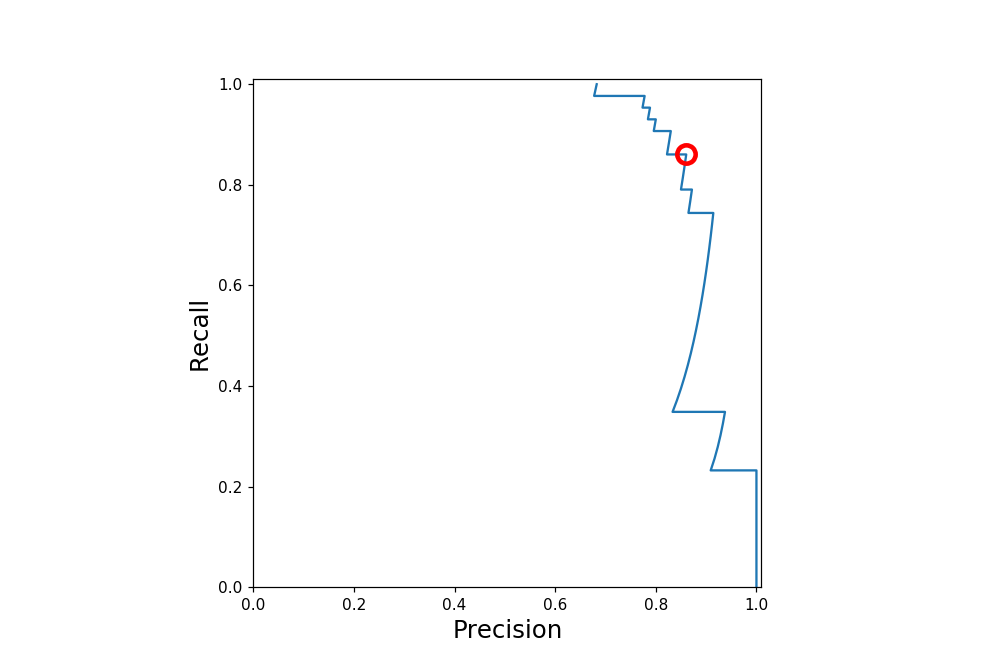

C:\Users\bista\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [17]:
from sklearn.metrics import precision_recall_curve      

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure(figsize=(9,6))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

### ROC & AUC
- ROC = Receiver Operating Characteristic
- AUC = Area Under Curve

C:\Users\bista\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<IPython.core.display.Javascript object>


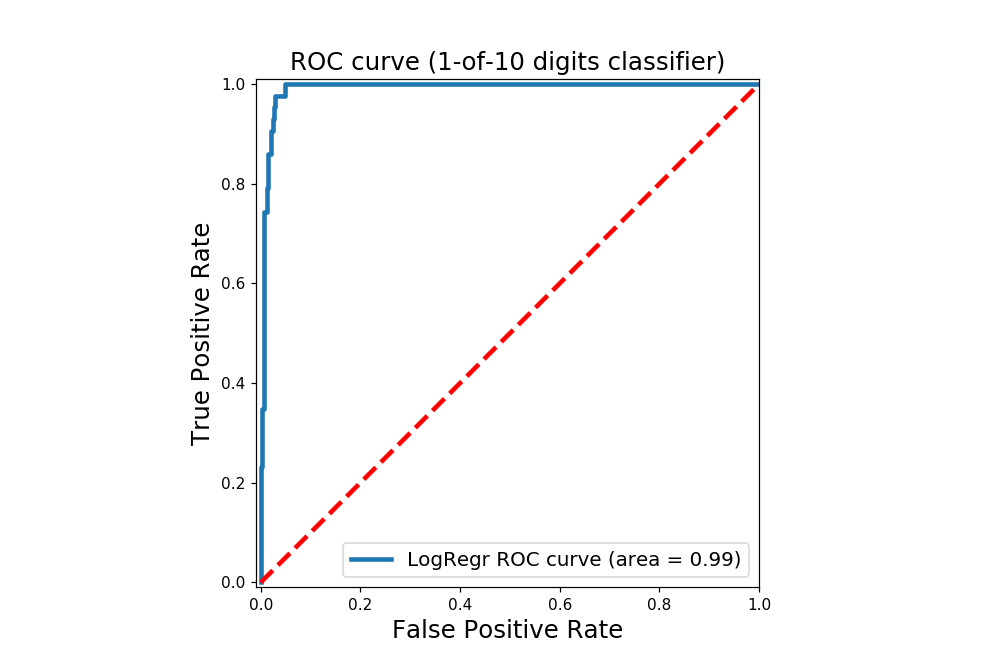

C:\Users\bista\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [18]:
from sklearn.metrics import roc_curve, auc  

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(9,6))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='red', lw=3, linestyle='--')
plt.axes().set_aspect('equal')

plt.show()

<IPython.core.display.Javascript object>


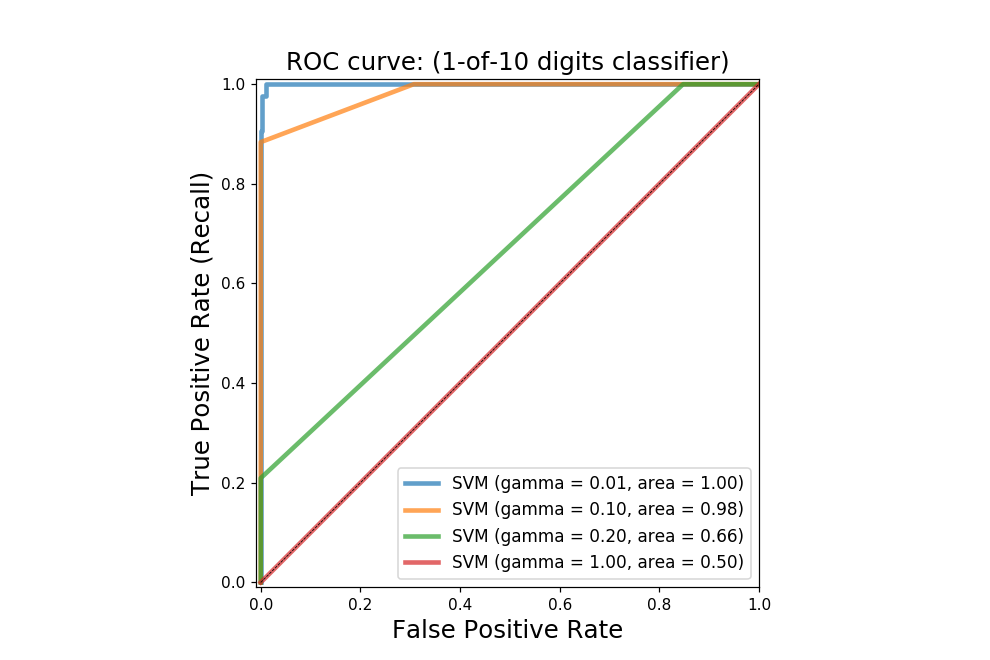

gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


C:\Users\bista\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [63]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure(figsize=(9,6))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

### Evaluation measures for multi-class classification

<IPython.core.display.Javascript object>


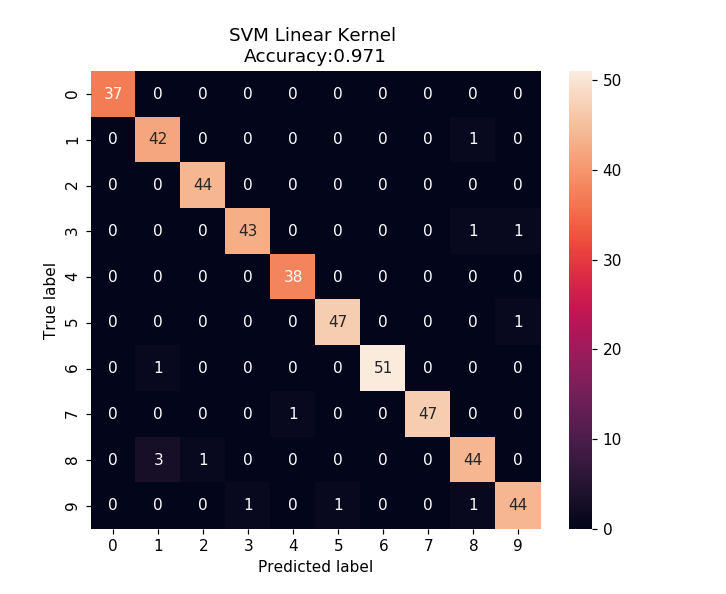

C:\Users\bista\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<IPython.core.display.Javascript object>


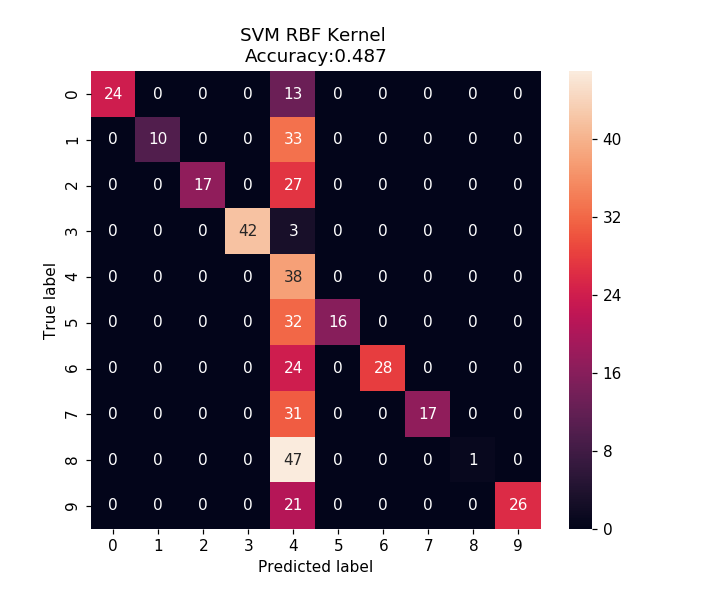

In [32]:
## let's take the sample dataset again
## and visualizing through "heatmap"
dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)


svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,10)], columns = [i for i in range(0,10)])

plt.figure(figsize=(6.6,5.4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                       svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

## repeating the foregoing visualization but based kernel on RBF
svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)],
                  columns = [i for i in range(0,10)])

plt.figure(figsize = (6.6,5.4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                    svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

Now we can see using SVM algorithm is better on linear kernel for this case.

#### Multi-class classification report

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test_mc, svm_predicted_mc))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79        37
           1       1.00      0.23      0.38        43
           2       1.00      0.39      0.56        44
           3       1.00      0.93      0.97        45
           4       0.14      1.00      0.25        38
           5       1.00      0.33      0.50        48
           6       1.00      0.54      0.70        52
           7       1.00      0.35      0.52        48
           8       1.00      0.02      0.04        48
           9       1.00      0.55      0.71        47

   micro avg       0.49      0.49      0.49       450
   macro avg       0.91      0.50      0.54       450
weighted avg       0.93      0.49      0.54       450



#### Micro- vs. Macro-averaged metrics

In [21]:
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import roc_curve, auc

In [22]:
## precision 

print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged precision = 0.49 (treat instances equally)
Macro-averaged precision = 0.91 (treat classes equally)


In [23]:
## f1

print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged f1 = 0.49 (treat instances equally)
Macro-averaged f1 = 0.54 (treat classes equally)


In [24]:
## recall

print('Micro-averaged recall = {:.2f} (treat instances equally)'
      .format(recall_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged recall = {:.2f} (treat classes equally)'
      .format(recall_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged recall = 0.49 (treat instances equally)
Macro-averaged recall = 0.50 (treat classes equally)


In [25]:
## accuracy

print('Micro-averaged accuracy = {:.2f} (treat instances equally)'
      .format(accuracy_score(y_test_mc, svm_predicted_mc)))
print('Macro-averaged accuracy = {:.2f} (treat classes equally)'
      .format(accuracy_score(y_test_mc, svm_predicted_mc)))                 

Micro-averaged accuracy = 0.49 (treat instances equally)
Macro-averaged accuracy = 0.49 (treat classes equally)


### Regression evaluation metrics

Linear model, coefficients:  [-698.80206267]
Mean squared error (linear model): 4646.74
r2_score (linear model): 0.06


<IPython.core.display.Javascript object>


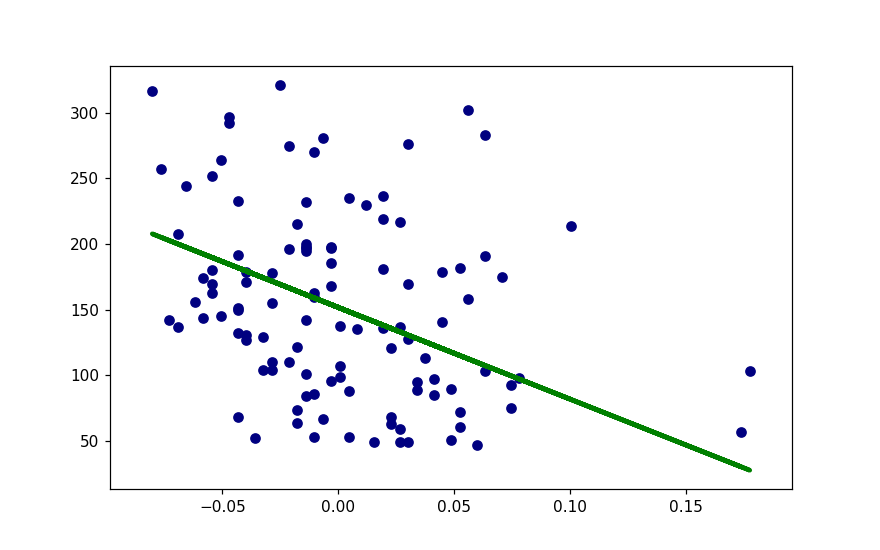

In [34]:
##
from sklearn import datasets
from sklearn.linear_model import LinearRegression
# from sklearn.metrics.regression import r2_score
from sklearn.metrics import mean_squared_error, r2_score

# let's take another dataset
diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lmPred = lm.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, lmPred)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, lmPred)))

# Plot outputs
plt.figure(figsize = (8,5))
plt.scatter(X_test, y_test,  color='navy')
plt.plot(X_test, lmPred, color='green', linewidth=3)

plt.show()

### Model selection using evaluation metrics

#### Cross-validation

In [27]:
# from sklearn.model_selection import cross_val_score 

# dataset = load_digits()
# X, y = dataset.data, dataset.target == 1
# clf = SVC(kernel='linear', C=1)     

# accuracy is the default scoring metric
# print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv=5))   

# use AUC as scoring metric
# print('Cross-validation (AUC)', cross_val_score(clf, X, y, cv=5, scoring = 'roc_auc'))

# use recall as scoring metric
# print('Cross-validation (recall)', cross_val_score(clf, X, y, cv=5, scoring = 'recall'))

In [36]:
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold

newData = load_digits()
# again, making this a binary problem with 'digit 1' as positive class 
# and 'not 1' as negative class

# convert to a dataframe
df = pd.DataFrame(data= np.c_[newData['data'], newData['target']])
                    # columns= newData['feature_names'] + ['target'])
X = pd.DataFrame(data= np.c_[newData['data']])
y = pd.DataFrame(data= np.c_[newData['target']]) == 1

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X1 = X_train
y1 = y_train

clf = SVC(kernel='linear', C=1)     

# accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(clf, X1, y1, cv=5))   

# use AUC as scoring metric
print('Cross-validation (AUC)', cross_val_score(clf, X1, y1, cv=5, scoring = 'roc_auc'))

# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(clf, X1, y1, cv=5, scoring = 'recall'))

C:\Users\bista\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bista\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bista\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bista\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-validation (accuracy) [0.96666667 0.98148148 0.97037037 0.97769517 0.98507463]


C:\Users\bista\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bista\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bista\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bista\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-validation (AUC) [0.98922668 0.99675325 0.99306375 0.99481328 0.99477486]
Cross-validation (recall) [0.92857143 0.85714286 0.85714286 0.92857143 0.92592593]


C:\Users\bista\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bista\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bista\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bista\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

#### Grid-Search 

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


clf = SVC(kernel='rbf')
## set parameters
parameters = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf = GridSearchCV(clf, param_grid = parameters)
grid_clf.fit(X_train, y_train)
y_decision_fn_scores = grid_clf.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf.best_params_)
print('Grid best score (accuracy): ', grid_clf.best_score_)

print('---------------------------')

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = parameters, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)


C:\Users\bista\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Grid best parameter (max. accuracy):  {'gamma': 0.001}
Grid best score (accuracy):  0.9962880475129918
---------------------------


C:\Users\bista\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Test set AUC:  0.99982858122393
Grid best parameter (max. AUC):  {'gamma': 0.001}
Grid best score (AUC):  0.9998741278302142


### Evaluation metrics supported for model selection

#### Precision-recall curve for the default SVC classifier (with balanced class weights)

<IPython.core.display.Javascript object>


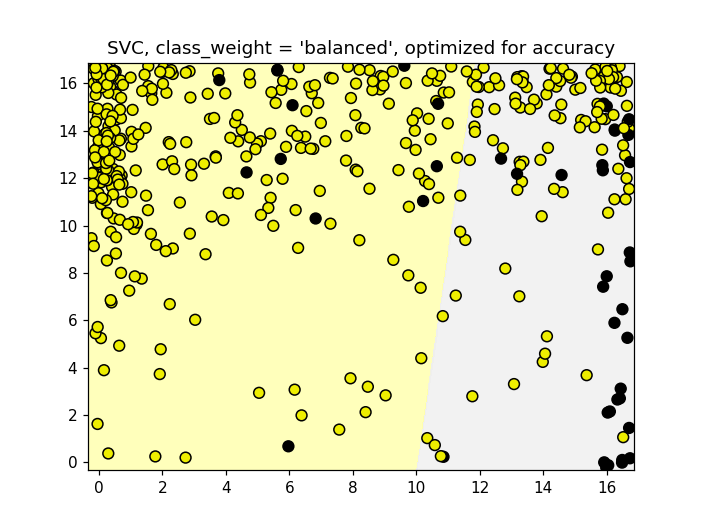

<IPython.core.display.Javascript object>


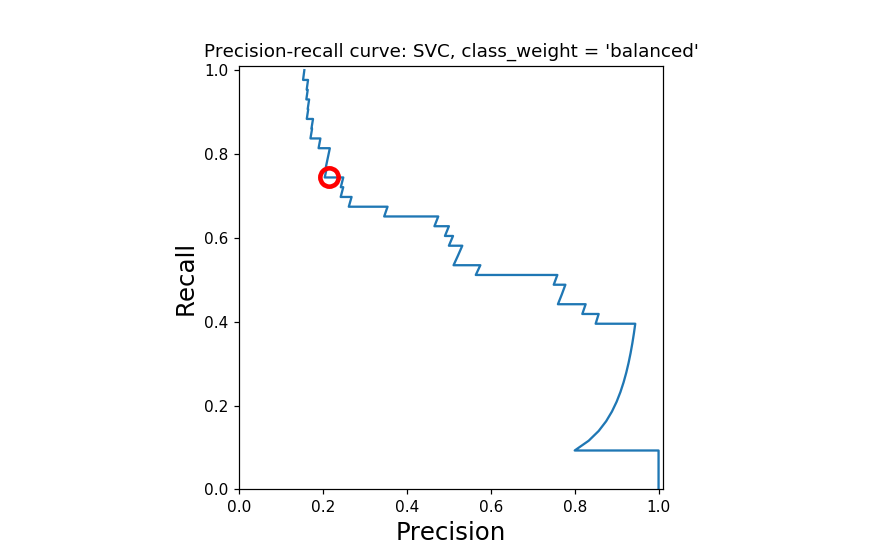

At zero threshold, precision: 0.21, recall: 0.74


C:\Users\bista\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [30]:
from sklearn.metrics import precision_recall_curve
from adspy_shared_utilities import plot_class_regions_for_classifier
from sklearn.svm import SVC

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# create a two-feature input vector matching the example plot above
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel='linear', class_weight='balanced').fit(X_twovar_train, y_train)

y_scores = clf.decision_function(X_twovar_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plot_class_regions_for_classifier(clf, X_twovar_test, y_test)
plt.title("SVC, class_weight = 'balanced', optimized for accuracy")
plt.show()

plt.figure(figsize=(8,5))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title ("Precision-recall curve: SVC, class_weight = 'balanced'")
plt.plot(precision, recall, label = 'Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
print('At zero threshold, precision: {:.2f}, recall: {:.2f}'
      .format(closest_zero_p, closest_zero_r))